# I. Import các thư viện cần thiết

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# II. Khám phá dữ liệu - EDA

## 1. Load dataset đã qua tiền xử lý

In [2]:
df = pd.read_csv("./data/marketing_campaign_cleaned.csv")
df.head()

,ID,Education,Marital_Status,Income,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,Complain,Z_CostContact,Z_Revenue,Response,Age,Age Group,Kids,Total Purchases,Spent,Family Size
0,5524,Graduation,Single,58138.0,2012-09-04,58,635,88,546,172,...,False,3,11,True,64,51-65,0,25,1617,1
1,2174,Graduation,Single,46344.0,2014-03-08,38,11,1,6,2,...,False,3,11,False,67,66+,2,6,27,3
2,4141,Graduation,In Relationship,71613.0,2013-08-21,26,426,49,127,111,...,False,3,11,False,56,51-65,0,21,776,2
3,6182,Graduation,In Relationship,26646.0,2014-02-10,26,11,4,20,10,...,False,3,11,False,37,36-50,1,8,53,3
4,5324,PhD,In Relationship,58293.0,2014-01-19,94,173,43,118,46,...,False,3,11,False,40,36-50,1,19,422,3


Kiểm tra số dòng và cột của dữ liệu

In [3]:
df.shape

(2236, 32)

Kiểm tra kiểu dữ liệu của các cột

In [4]:
df.dtypes

ID                       int64
Education               object
Marital_Status          object
Income                 float64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3              bool
AcceptedCmp4              bool
AcceptedCmp5              bool
AcceptedCmp1              bool
AcceptedCmp2              bool
Complain                  bool
Z_CostContact            int64
Z_Revenue                int64
Response                  bool
Age                      int64
Age Group               object
Kids                     int64
Total Purchases          int64
Spent                    int64
Family Size              int64
dtype: o

Nhìn chung, kiểu dữ liệu đã sẵn sàng cho việc phân tích

## 3. Phân tích khách hàng

### a. Phân tích trên một thuộc tính

**Phân tích về thu nhập của khách hàng**

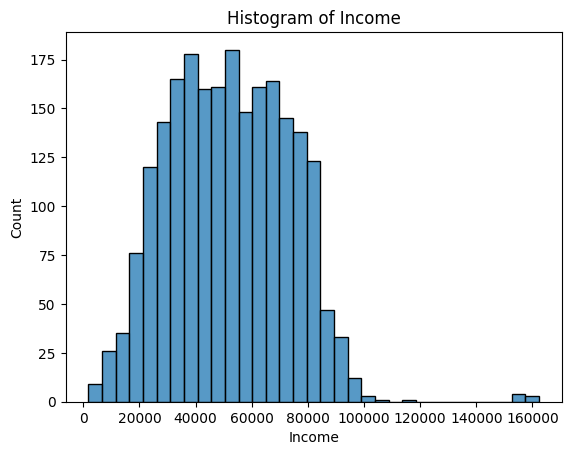

In [5]:
sns.histplot(df['Income'])
plt.title("Histogram of Income");

- Nhìn chung, khách hàng của chúng ta có mức thu nhập tập trung quanh mức trung bình

- Khách hàng với thu nhập thấp hoặc cao hơn mức 80000 có xu hướng ít mua sản phẩm của chúng ta

- Ngoài ra, cũng có số ít khách hàng với thu nhập rất cao


Lý do chọn `Histogram`: mục đích để quan sát được sự phân bố trong thu nhập của khách hàng như thế nào


**Phân tích về học vấn của khách hàng**

Text(0.5, 1.0, 'Education')

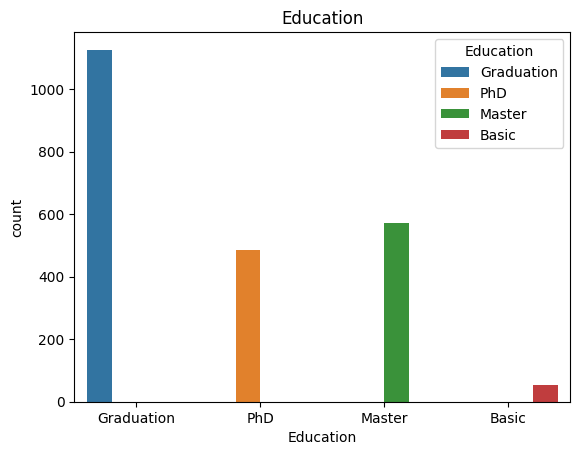

In [6]:
sns.countplot(x='Education', data=df, hue='Education');
plt.title("Education")

- Nhìn chung, đa số khách hàng đều có bằng đại học

- Bên cạnh đó, một số lượng tương đối đáng kể có học vấn là Thạc sĩ, Tiến sĩ

- Số lượng khách hàng có học vấn phổ thông tương đối ít


Qua đó ta thấy được:

- Phần lớn khách hàng của công ty có học vấn khá cao

- Có thể thấy họ có thể tạo ra thu nhấp tương đối ổn và sẵn sàng mua sản phẩm của công ty. Tuy nhiên, với học vấn cao có thể sẽ khắt khe trong chất lượng sản phẩm để xứng đáng với giá tiền sản phẩm, chất lượng dịch vụ...

Lý do chọn `barchart`: mục tiêu là để so sánh số lượng khách hàng theo học vấn


**Phân tích về thời điểm mua hàng lần đầu**

Trung binh số lượng khách hàng mới mỗi tháng: 186.33333333333334


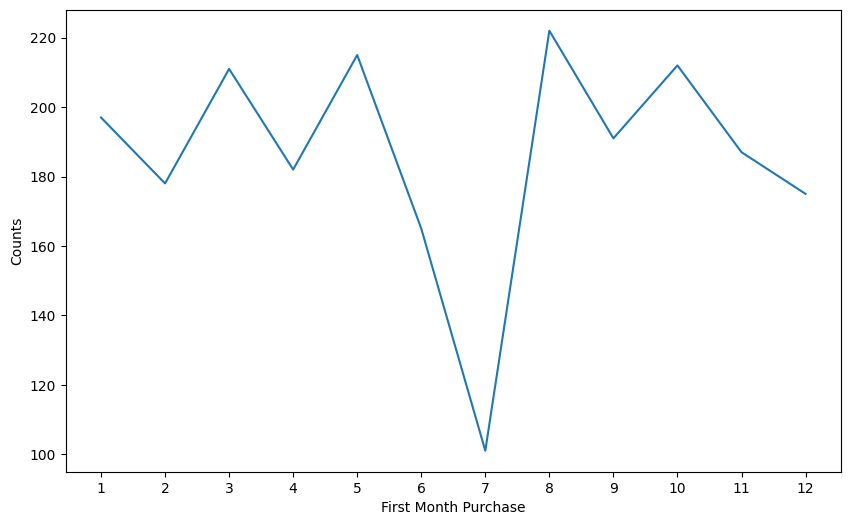

In [7]:
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])
df['First Month Purchase'] = df['Dt_Customer'].dt.month
df_counts = df.groupby('First Month Purchase').size().reset_index(name='Counts')
print("Trung binh số lượng khách hàng mới mỗi tháng:",df_counts['Counts'].mean())
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_counts, x='First Month Purchase', y='Counts');
plt.xticks(np.arange(1, 13, 1));

- Số lượng khách hàng mua hàng lần đầu phân bố không ổn định giữa cách tháng và có nhiều dao động

- Số lượng khách hàng mới giảm đột ngột từ sau tháng 5 đến tháng 7

- Ở tháng 7, số lượng khách hàng mới là ít nhất

- Qua tới tháng 8 thì lượng khách hàng đã tăng trở lại

- Trung bình mỗi tháng, công ty có thêm 186 khách hàng mới

Qua đó, ta có thể rút ra về sự giảm sút trong các tháng 5, 6, 7:

- Có thể những sản phẩm hiện tại là chưa phù hợp trong tháng 

- Nhiệt độ và thời tiết có thể là nguyên nhân khiến cho sản phẩm khó tiếp cận được khách hàng

- Tại Brazil, những tháng 5, 6, 7 là những tháng có nhiệt độ nóng nhất năm. Qua đó, một số sản phẩm sẽ khó tiệp cận được khách hàng do đặc tính sản phẩm có thể không phù hợp


Lý do chọn `line chart`: quan sát sự thay đổi, xu hướng của số lượng khách hàng mới theo thời gian (tháng)


In [8]:
df['Response'].value_counts()

Response
False    1902
True      334
Name: count, dtype: int64

**Tỉ lệ mua hàng trên các nền tảng**

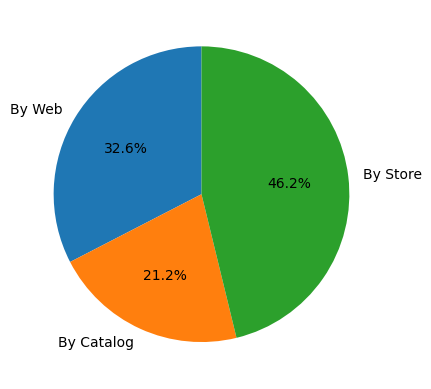

In [9]:
platform_counts={
    "By Web": df['NumWebPurchases'].sum(),
    "By Catalog": df['NumCatalogPurchases'].sum(),
    "By Store": df['NumStorePurchases'].sum(),
    #"By Deals": df['NumDealsPurchases'].sum()
}
plt.pie(platform_counts.values(), labels=platform_counts.keys(), autopct='%1.1f%%', startangle=90);


- Đa số khách hàng mua sản phẩm trực tiếp tại cửa hàng

- Tiếp đến là nền tảng Web

- Mua trên Catalog là ít nhất

- Tỉ lệ mua trực tiếp cao nên ta cần phải đầu tư cho giao diện của cửa hàng, đảm bảo thu hút khách hàng và nằm ở vị trị dễ đi đến.


Lý do sử dụng `pie chart`: để so sánh các thành phần với nhau, dễ quan sát hơn khi muốn có cái nhìn mang tính tổng thể

**Phân tích về số tỉ lệ than phiền trong dịch vụ**

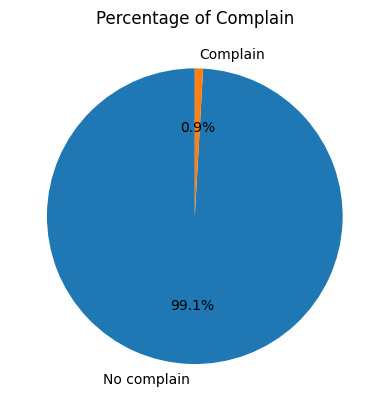

In [10]:
complain_counts = df['Complain'].value_counts()

plt.pie(complain_counts, labels=['No complain', 'Complain'], autopct='%1.1f%%', startangle=90);
plt.title('Percentage of Complain');


- Mức độ không hài lòng đối với dịch vụ của công ty chỉ ở mức 0.9%

- Đây là thông tin tích cực về hoạt động kinh doanh của công ty


Lý do dùng `pie chart`: để so sánh tỉ lệ giữa hai nhãn, dễ quan sát hơn khi muốn có cái nhìn mang tính tổng thể

**Phân tích tình trạng mối quan hệ của khách hàng**

Text(0.5, 1.0, 'Marital Status')

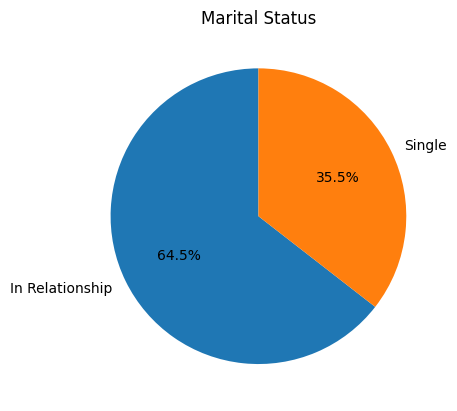

In [11]:
marital_status_counts = df['Marital_Status'].value_counts()
plt.pie(marital_status_counts, labels=marital_status_counts.index, autopct='%1.1f%%', startangle=90);
plt.title('Marital Status')

- Gần 2/3 số lượng khách hàng đang trong mối quan hệ

- Chỉ 1/3 số lượng khách hàng trong trạng thái độc thân

Qua đó thấy được rằng:

- Tệp khách hàng đông đảo nhất là các cặp đôi. Bên cạnh đó, tệp khách hàng này khi thực hiện giao dịch cũng sẽ mua nhiều sản phẩm hơn vì khẩu phần ăn lớn như combo 2 người... . Qua đó, đem lại doanh số cao nhất

- Các sản phẩm trong tương lai nên nhắm đến các sản phẩm phù hợp cho cặp đôi để tối ưu hoá doanh thu

- Bên cạnh đó, số lượng khách hàng độc thân không phải ít, cần phải duy trì và cải thiện chất lượng của các sản phẩm phù hợp như: các phần ăn đơn

Lý do dùng `pie chart`: để so sánh tỉ lệ giữa hai nhãn, dễ quan sát hơn khi muốn có cái nhìn mang tính tổng thể

**Phân tích về nhóm tuổi của khách hàng**


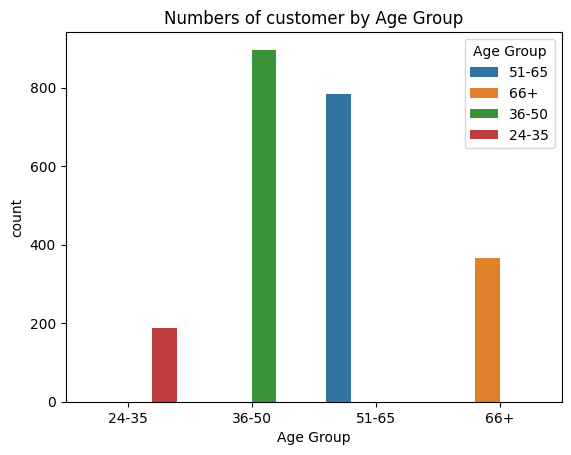

In [12]:
age_group_counts = df['Age Group'].value_counts()
age_group_counts.sort_index(inplace=True)
plt.title("Numbers of customer by Age Group")
sns.countplot(x='Age Group',hue='Age Group', data=df, order=age_group_counts.index);

- Một phát hiện thú vị rằng, tuy iFood là ứng dụng giao đồ ăn trực tuyến (dễ tiếp cận với giới trẻ) mà nhóm tuổi (24-35) lại chiếm số lượng ít nhất (thậm chí còn ít hơn nhóm trên 66 tuổi). Mặc dù, chúng ta vẫn thường thấy người trẻ tuổi thường xuyên chi tiền cho việc ăn uống là nhiều nhất

- Đa số khách hàng tập trung trong độ tuổi (36-50) và (51-65)

- Một thông tin tích cực được rút ra, mặc dù khách hàng có độ tuổi cao nhưng vẫn thao tác dễ dàng với ứng dụng iFood. Có vẻ có sự thành công trong việc thiết kế phần mềm, giao diện thân thiện. Trong tương lai, chúng ta nên giữ vững cách thiết kế hiện tại

- Một lí do khiến nhóm 34-35 ít hơn cũng do ta chia bin không đều.
Lý do chọn `barchart`: mục tiêu là để so sánh các đối tượng với nhau


**Phân tích về số lượng con của khách hàng**

In [13]:
kids_counts = df["Kids"].value_counts().sort_index()


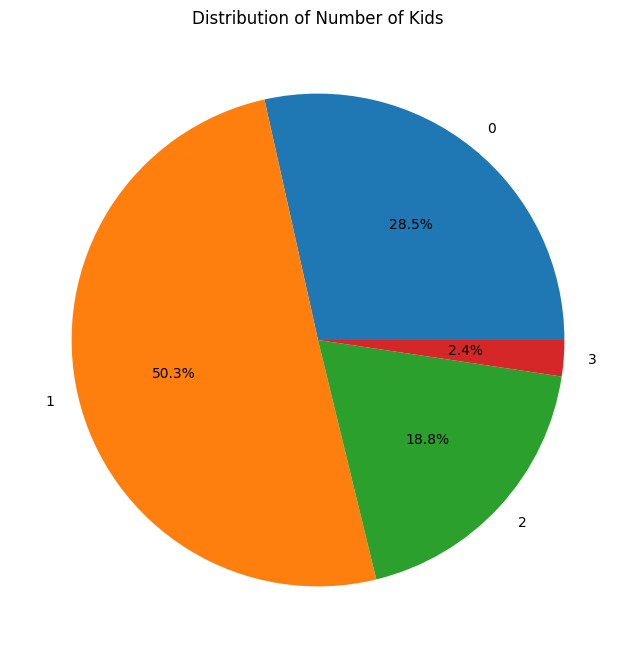

In [14]:
plt.figure(figsize=(8, 8))
plt.pie(kids_counts, labels=kids_counts.index, autopct='%1.1f%%')
plt.title('Distribution of Number of Kids')
plt.show()

- Khoảng 50.35% khách hàng có 1 con

- Khoảng 28.48% khách hàng có 0 con

- Khoảng 18.79% khách hàng có 2 con

- Khoảng 2.36% khách hàng có 3 con

- Nhìn chung, tệp khách hàng có con vẫn chiếm đa số. Do vậy cần bổ sung và cải thiện một số món ăn dành cho trẻ em để đảm bảo sẵn sàng phục vụ

**Phân tích về số lượng giao dịch của khách hàng**

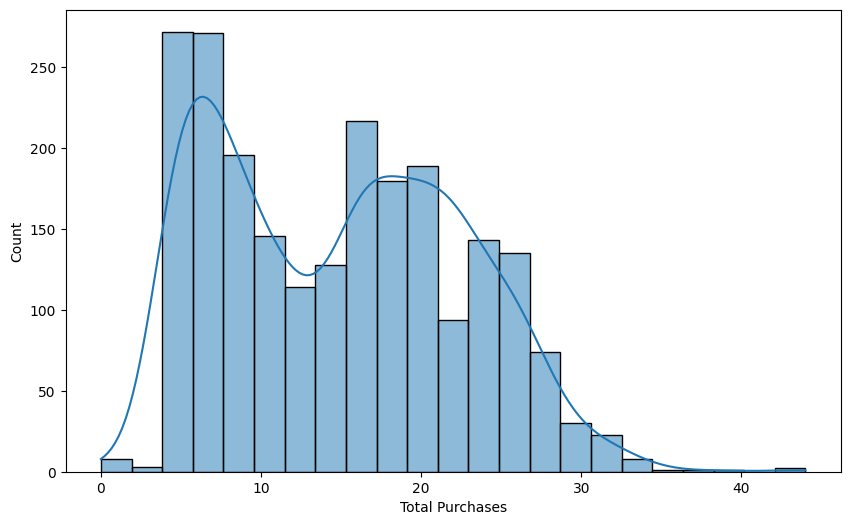

In [15]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Total Purchases'], kde=True);

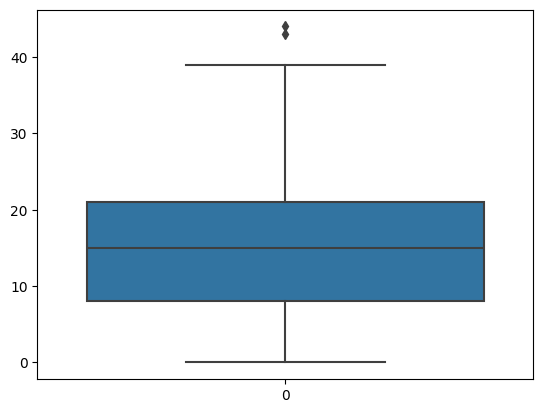

In [16]:
sns.boxplot(df['Total Purchases']);

- Số lượng sản phẩm được mua tập chung nhiều lần lượt ở mức: 5, 7 và 17 sản phẩm

- Ngooài ra, cũng có một điểm ngoại lệ (theo boxplot) cho thấy số lượng giao dịch rất lớn


Lý do dùng `histogram`: quan sát phân bổ của thuộc tính

Lý do dùng `boxplot`: tìm ra giá trị outlier

### b. Phân tích trên nhiều thuộc tính

- Dù là phân tích trên nhiều thuộc tính, nhưng hai thuộc tính mà ta quan tâm nhất là 'Income' và 'Spent' (thu nhập và chi tiêu) do đây là hai yếu tố ảnh hưởng đến doanh số bán hàng

#### Ta thử vẽ pair plot để xem một cách tổng quát

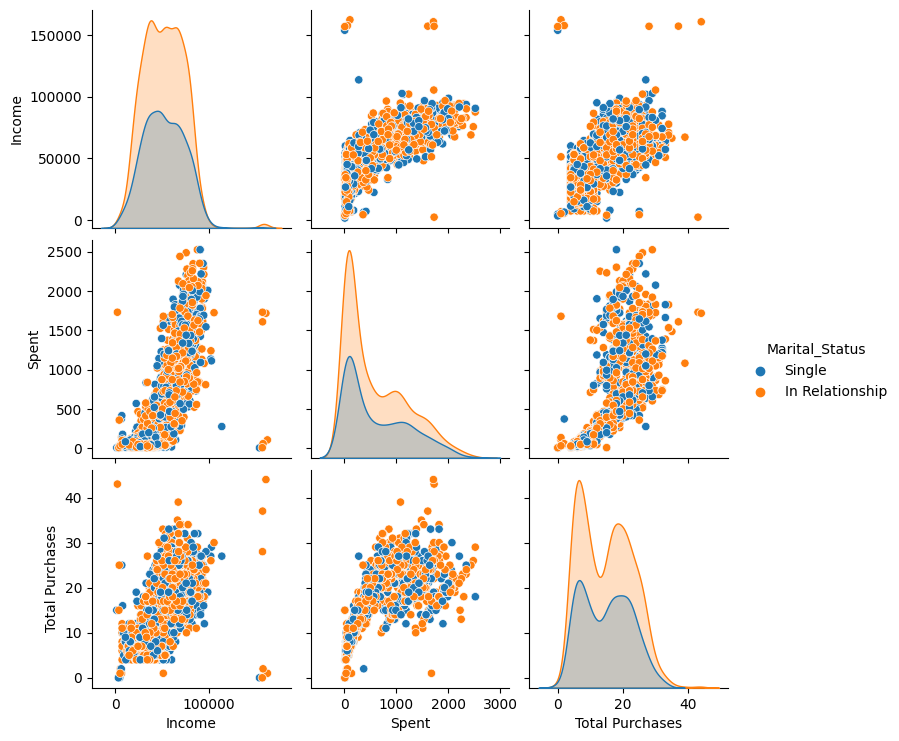

In [17]:
sns.pairplot(df[['Income', 'Spent','Total Purchases', 'Marital_Status']], hue = 'Marital_Status');

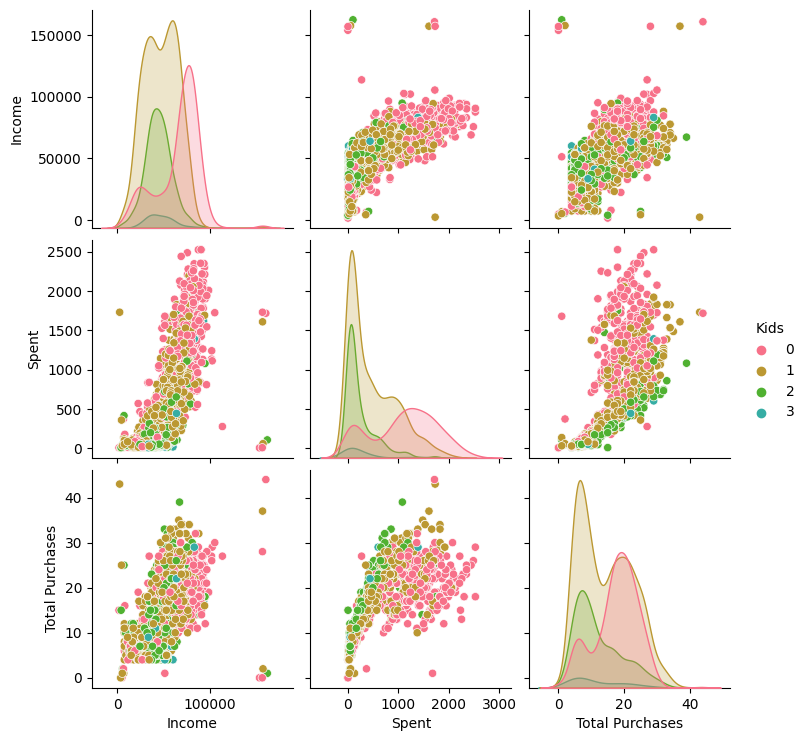

In [18]:
custom_palette = sns.color_palette("husl")
sns.pairplot(df[['Income', 'Spent','Total Purchases', 'Kids']], hue = 'Kids', palette=custom_palette);

Nhận xét về mối quan hệ giữa thu nhập và chi tiêu
- Nhìn chung, có sự tương quan nhẹ giữa thu nhập và chi tiêu. Thu nhập càng cao càng có xu hướng chi tiền nhiều hơn cho việc mua hàng
- Tuy nhiên cũng có một vài điểm ngoại lệ. Tuy thu nhập ít nhưng mua rất nhiều sản phẩm, thu nhập cao nhưng lại mua rất ít
- Có thể một số khách hàng thu nhập cao là khách hàng mới nên số lượng giao dịch chưa nhiều

Nhận xét về thu nhập
- Các khách hàng ở trong mối quan hệ (In relationship) có thu nhập hộ gia đình khá tương đồng với nhóm khách hàng độc thân.
- Thế nhưng ở dưới ta lại thấy, nhóm khách hàng có 1 con có thu nhập hộ gia đình cao nhất, tiếp đến là nhóm khách hàng không có con.
- Nhóm khách hàng có 2 hoặc 3 con có thu nhập kém nhất.

Nhận xét về chi tiêu: 
- Các khách hàng ở trong mối quan hệ (In relationship) chi tiêu khá tương đồng với nhóm khách hàng độc thân.
- Nhóm khách hàng có 1 con có chi tiêu nhiều nhất, nhóm khách hàng 3 con chi tiêu ít nhất

Nhận xét về số lượng mua hàng:
- Nhìn chung khá giống thu nhập
- Các khách hàng ở trong mối quan hệ (In relationship) có sô lượng mua hàng khá tương đồng nhóm khách hàng độc thân.
- Nhóm khách hàng có 1 con có số lượng mua hàng nhiều nhất, tiếp đến là nhóm khách hàng không có con.
- Nhóm khách hàng có 2 hoặc 3 con có số lượng mua hàng kém nhất.

Giải thích: 
- Những khách hàng không có con thường có thu nhập cao và chi tiêu nhiều nhất so với các nhóm còn lại. Lí do có thể là vì không có con nên chi tiêu cho giáo dục, nuôi dạy con cái được giảm bớt dẫn đến tiêu xài cho bản thân nhiều hơn

#### Để thấy rõ hơn sự khác biệt của của 'Spent' và 'Income' đối với số lượng kid của mỗi gia đình, ta có thể sử dụng boxplot

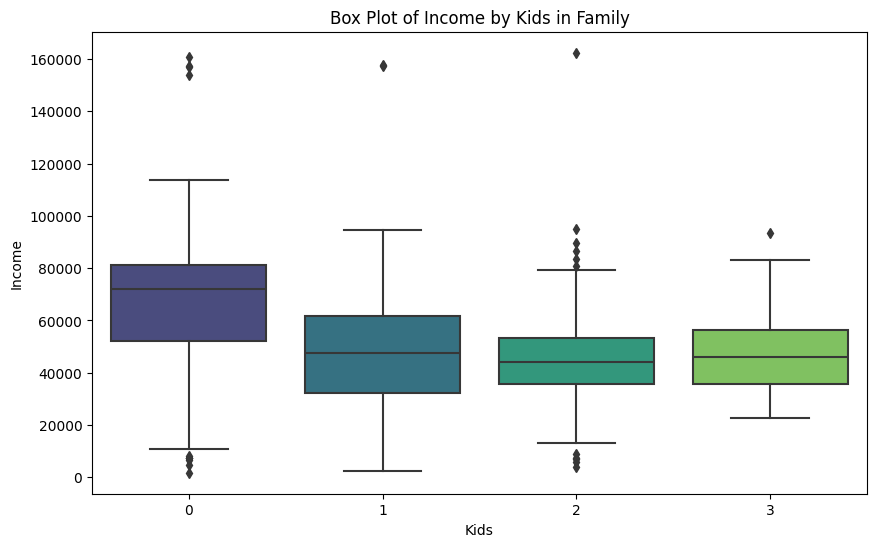

In [19]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Kids', y='Income', palette='viridis')
plt.title('Box Plot of Income by Kids in Family')
plt.xlabel('Kids')
plt.ylabel('Income')
plt.show()

- Nhóm khách hàng không có con thường có thu nhập cao hơn nhóm khách hàng còn lại. Điều này khá lạ bởi thu nhập được tính theo thu nhập hộ gia đình.  
- Một cách lý giải cho điều này là do phụ nữ ở Brazil thường ở nhà làm nội trợ, nên thành ra không có sự khác biệt đáng kể giữa thu nhập hộ gia đình giữ người độc thân và người có gia đình

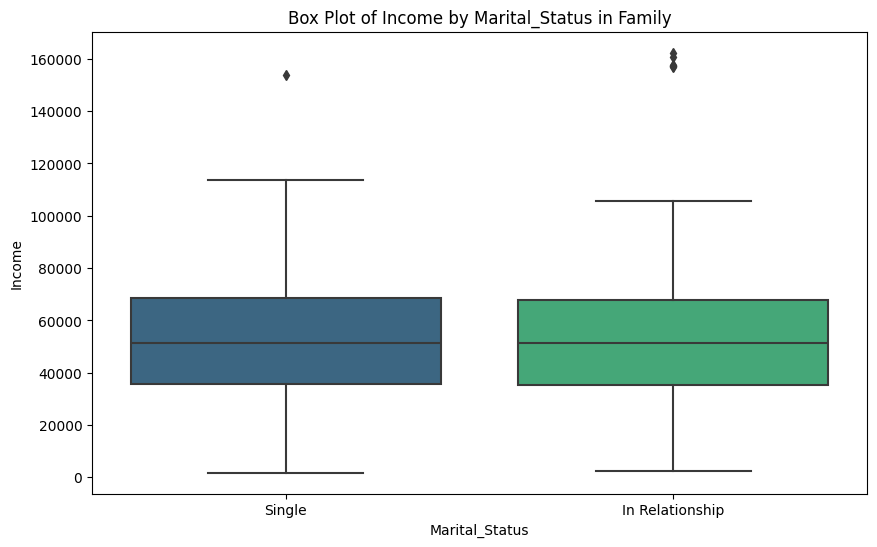

In [20]:
#filter_df = df[df['Kids']==0]
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Marital_Status', y='Income', palette='viridis')
plt.title('Box Plot of Income by Marital_Status in Family')
plt.xlabel('Marital_Status')
plt.ylabel('Income')
plt.show()

- Đúng như những gì ta đã nói, không có sự khác biệt đáng kể trong thu nhập giữa người có gia đình và người độc thân.
- Vậy lí do khiến cho việc thu nhập càng cao thì số con càng ít có thể là do những người thu nhập cao ngại sinh con.

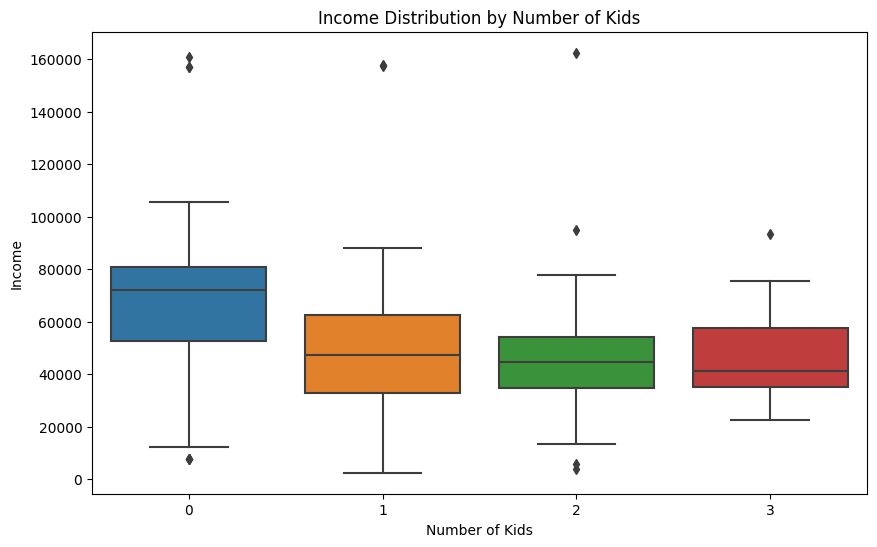

In [21]:
filter_df = df[df['Marital_Status']=='In Relationship']

# Vẽ biểu đồ Boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Kids', y='Income', data=filter_df)
plt.title('Income Distribution by Number of Kids')
plt.xlabel('Number of Kids')
plt.ylabel('Income')
plt.show()

- Sau khi lọc những người độc thân và trực quan, ta vẫn thấy rõ những người có thu nhập cao ngại sinh con hơn.

Xem xét chi tiêu theo số lượng con trong mỗi gia đình

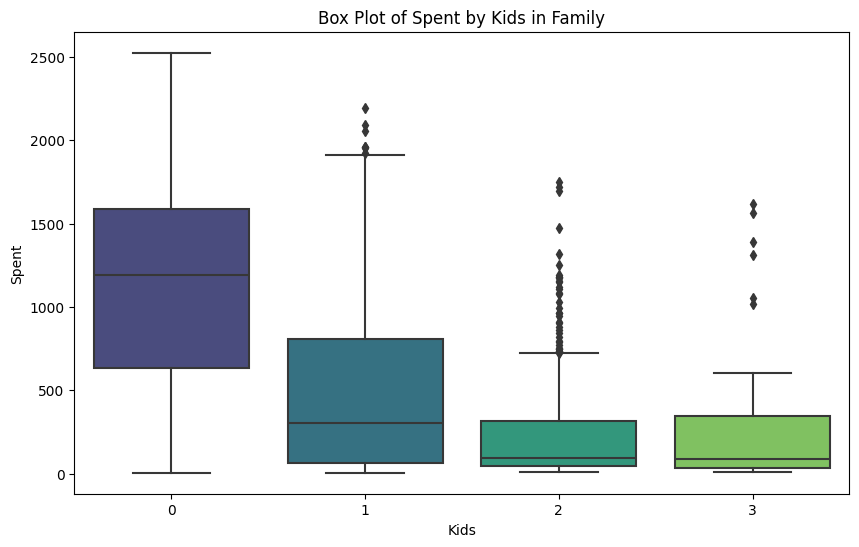

In [22]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Kids', y='Spent', palette='viridis')
plt.title('Box Plot of Spent by Kids in Family')
plt.xlabel('Kids')
plt.ylabel('Spent')
plt.show()

- Những khách hàng không có con thường chi tiêu nhiều hơn so với các nhóm còn lại.
- Lí do: 
  - Những người không có con thu nhập nhiều hơn nên chi tiêu nhiều hơn.
  - Có thể là vì không có con nên chi tiêu cho giáo dục, nuôi dạy con cái được giảm bớt dẫn đến tiêu xài cho bản thân nhiều hơn. 

#### Ta sẽ quan sát thêm cả thuộc tính `Education` để xem liệu rằng học vấn có ảnh hưởng đến `Income` và `Spending` hay không?

Để thêm sự chi tiết, ta sẽ quan sát thêm cả thuộc tính `Education` để xem liệu rằng nó có bị ảnh hưởng bởi học vấn không?

In [23]:
df["Education"].value_counts()

Education
Graduation    1126
Master         571
PhD            485
Basic           54
Name: count, dtype: int64

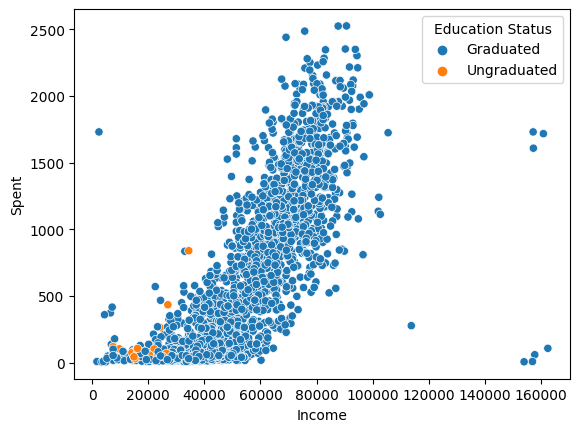

In [24]:
df['Education Status'] = df['Education'].apply(lambda x: "Graduated" if x in ['Graduation', 'Master', 'PhD'] else "Ungraduated")

sns.scatterplot(df, x='Income', y='Spent', hue='Education Status');


- Nhóm chưa tốt nghiệp có một ngoại lệ, tuy thu nhập ở mức trung bình nhưng có số lượng giao dịch tương đối cao

- Có vẻ như nhóm chưa tốt nghiệp có thu nhập ở mức thấp và có lượng giao dịch là ít nhất

- Nhóm đã tốt nghiệp chiếm đa số



#### Bây giờ ta hãy thử xét `income`   dựa theo `Age Group'

In [25]:
sum_group = df[['Spent', 'Age Group']].groupby('Age Group').sum()
mean_group = df[['Spent', 'Age Group']].groupby('Age Group').mean()

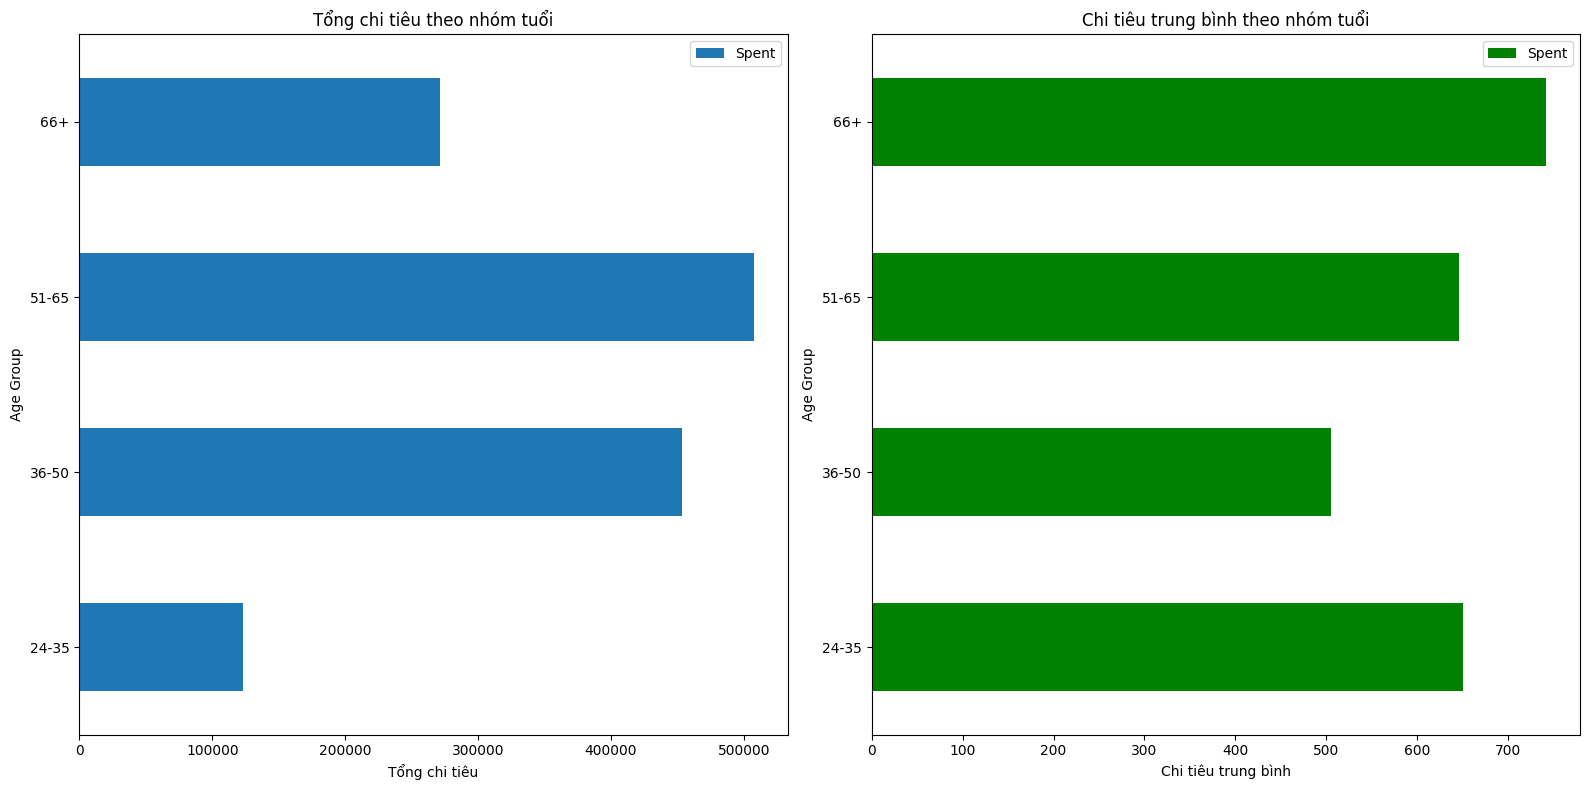

In [26]:
fig, axes = plt.subplots(1,2,figsize=(16,8))

sum_group.plot(kind='barh', ax=axes[0])
axes[0].set_title('Tổng chi tiêu theo nhóm tuổi')
axes[0].set_xlabel('Tổng chi tiêu')

mean_group.plot(kind='barh', ax=axes[1], color='green')
axes[1].set_title('Chi tiêu trung bình theo nhóm tuổi')
axes[1].set_xlabel('Chi tiêu trung bình')

plt.tight_layout()
plt.show()

Nhận xét: 
- Nhóm tuổi từ 51-65 có tổng chi tiêu cao nhất.
- Nhóm tuổi từ 24-35 có tổng chi tiêu thấp nhất.
- Mặc dù chiếm tỉ lệ đông nhất, nhóm khách hàng từ 35-50 tuổi lại có tổng chi tiêu thấp hơn so với nhóm từ 51-65 tuổi.

Giải thích:
- Sự khác biệt này có thể dễ hiểu khi xem xét phân bố các độ tuổi trong dữ liệu.  

Nhận xét:
- Nhóm tuổi 66+ có chi tiêu trung bình cao nhất.
- Nhóm 36-50 tuổi có chi tiêu trung bình thấp nhất.  

Giải thích:
- Có thể do nhóm từ 36-50 tuôi phải lo nhiều vấn đề về gia đình hơn như nuôi con, đóng tiền trả góp nhà xe nên chi tiêu sẽ ít hơn.
- Nhóm 66+ có khi đã về hưu, nên chi tiêu nhiều hơn cho sở thích cá nhân.
- Ngoài ra, cũng có thể do các mặt hàng hóa được bán nên gây ảnh hưởng đến chi tiêu trung bình. Ta sẽ xem xét kĩ việc này ở phần phân tích sản phẩm.
- Khi nãy ta cũng đã thấy thu nhập càng nhiều, chi tiêu càng tăng, nên ta có thể xem xét qua thu nhập thừng nhóm tuổi để chứng minh.

#### Bây giờ ta hãy thử xét `Total Purchases`   dựa theo `Age Group'

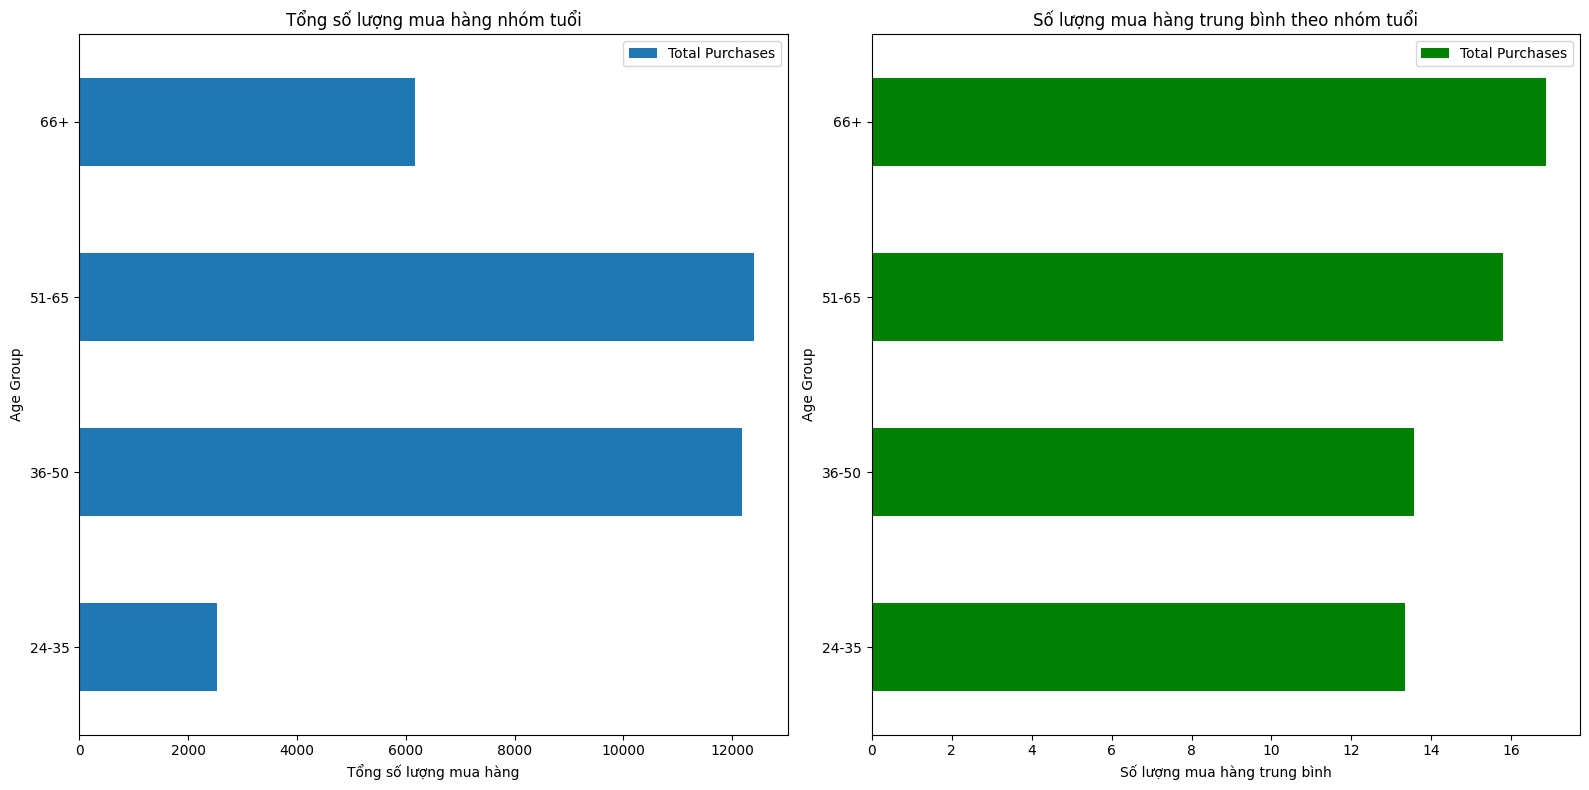

In [27]:
sum_group = df[['Total Purchases', 'Age Group']].groupby('Age Group').sum()
mean_group = df[['Total Purchases', 'Age Group']].groupby('Age Group').mean()

fig, axes = plt.subplots(1,2,figsize=(16,8))

sum_group.plot(kind='barh', ax=axes[0])
axes[0].set_title('Tổng số lượng mua hàng nhóm tuổi')
axes[0].set_xlabel('Tổng số lượng mua hàng')

mean_group.plot(kind='barh', ax=axes[1], color='green')
axes[1].set_title('Số lượng mua hàng trung bình theo nhóm tuổi')
axes[1].set_xlabel('Số lượng mua hàng trung bình')

plt.tight_layout()
plt.show()

Nhận xét: 
- Nhóm tuổi từ 51-65 và 36-50 có số lượng mua hàng gần bằng nhau và đứng đầu
- Nhóm tuổi từ 24-35 có tổng số lượng mua hàng thấp nhất.

Giải thích:
- Sự khác biệt này có thể dễ hiểu khi xem xét phân bố các độ tuổi trong dữ liệu.  

Nhận xét:
- Nhóm tuổi 66+ có số lượng mua hàng trung bình cao nhất.
- Nhóm 24-35 tuổi có số lượng mua hàng trung bình thấp nhất.  
- Thế nhưng ở trên ta lại thấy chi tiêu trung bình của nhóm 24-35 lại cao hơn hẳn nhóm 36-50 dù số lượng mua hàng thấp hơn.


Giải thích:
- Có thể do nhóm 36-50 thường mua hàng hóa có giá trị thấp hơn hoặc mua hàng có nhiều ưu đãi hơn nhóm tuổi 24-35

#### Bây giờ ta hãy thử xét `Income`   dựa theo `Age Group'

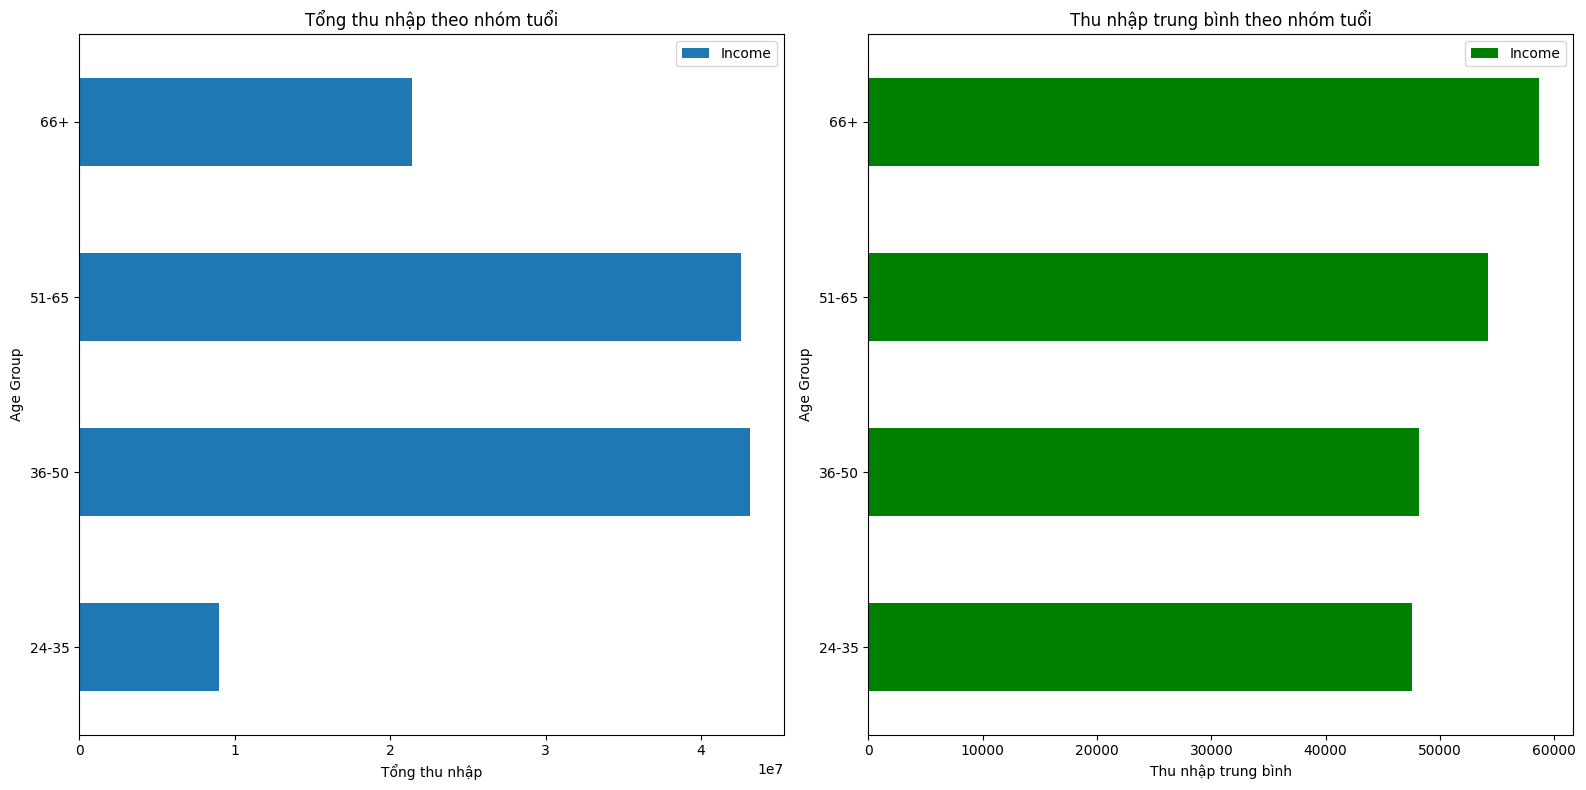

In [28]:
sum_group = df[['Income', 'Age Group']].groupby('Age Group').sum()
mean_group = df[['Income', 'Age Group']].groupby('Age Group').mean()

fig, axes = plt.subplots(1,2,figsize=(16,8))

sum_group.plot(kind='barh', ax=axes[0])
axes[0].set_title('Tổng thu nhập theo nhóm tuổi')
axes[0].set_xlabel('Tổng thu nhập')

mean_group.plot(kind='barh', ax=axes[1], color='green')
axes[1].set_title('Thu nhập trung bình theo nhóm tuổi')
axes[1].set_xlabel('Thu nhập trung bình')

plt.tight_layout()
plt.show()

Nhận xét: 
- Nhóm tuổi từ 51-65 và 36-50 có tổng thu nhập cao nhất.
- Nhóm tuổi từ 24-35 có tổng thu nhập thấp nhất.

Giải thích:
- Sự khác biệt này có thể dễ hiểu khi xem xét phân bố các độ tuổi trong dữ liệu.  

Nhận xét:
- Tuổi càng cao, nhu nhập càng tăng.
- Điều này khá lạ khi nhóm tuổi 66+ có khả năng phần lớn là đã về hưu.  


Giải thích:
- Có thể do nhóm từ 36-50 tuôi phải lo nhiều vấn đề về gia đình hơn như nuôi con, đóng tiền trả góp nhà xe nên chi tiêu sẽ ít hơn.
- Nhóm 66+ có khi đã về hưu, nên chi tiêu nhiều hơn cho sở thích cá nhân.
- Ngoài ra, cũng có thể do các mặt hàng hóa được bán nên gây ảnh hưởng đến chi tiêu trung bình. Ta sẽ xem xét kĩ việc này ở phần phân tích sản phẩm.
- Khi nãy ta cũng đã thấy thu nhập càng nhiều, chi tiêu càng tăng, nên ta có thể xem xét qua thu nhập thừng nhóm tuổi để chứng minh.

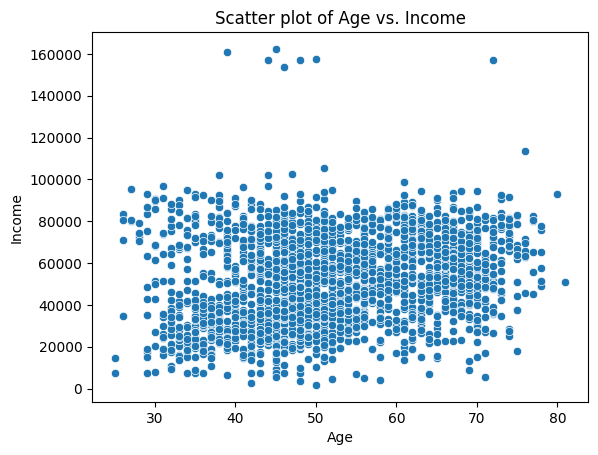

In [29]:
sns.scatterplot(x='Age', y='Income', data=df)
plt.title('Scatter plot of Age vs. Income')
plt.xlabel('Age')
plt.ylabel('Income')
plt.show()

Nhân xét: 
- Kiểm tra lại thông qua scatterplot, ta nhận thấy không có sự tương quan đáng kể giữa độ tuổi và thu nhập.

## 4. Phân tích về sản phẩm

### Xem xét chi tiêu cho từng sản phẩm theo nhóm tuổi

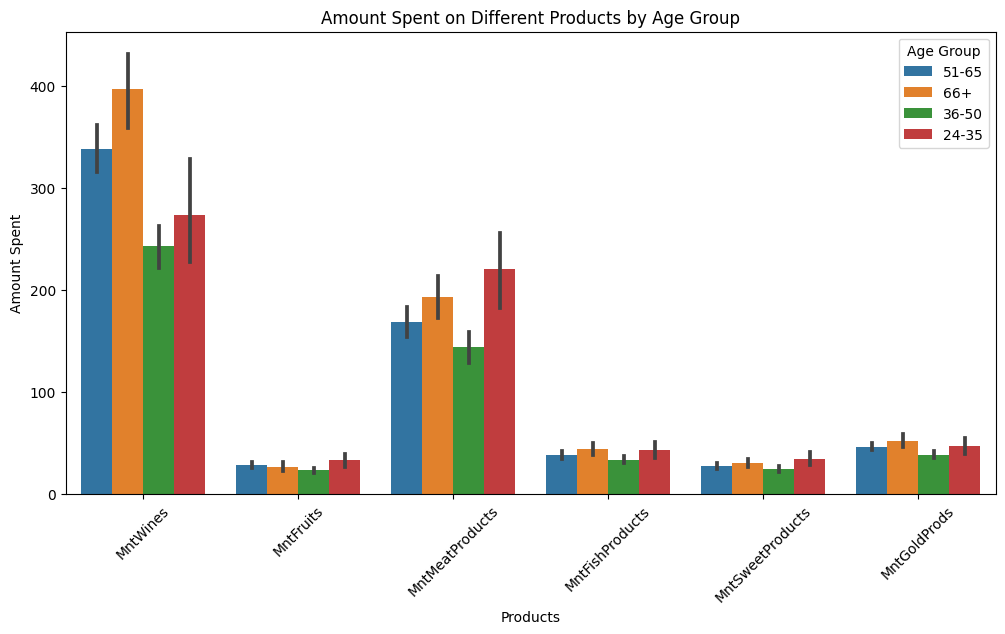

In [31]:
products_age_df = df[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'Age Group']]
products_age_df = products_age_df.melt(id_vars='Age Group', var_name='Products', value_name='Amount Spent')

plt.figure(figsize=(12, 6))
sns.barplot(data=products_age_df, x='Products', y='Amount Spent', hue='Age Group')
plt.title('Amount Spent on Different Products by Age Group')
plt.xlabel('Products')
plt.ylabel('Amount Spent')
plt.xticks(rotation=45) 
plt.legend(title='Age Group', loc='upper right')
plt.show()


Nhận xét:  
- Sản phẩm được chi tiêu nhiều nhất là Rượu
- Sản phâm được chi tiêu nhiều thứ nhì là Thịt  
- Nhóm khách hàng 66+ chi tiêu nhiều sản phẩm rượu nhất.
- Nhóm khách hàng 24-35 chi tiêu nhiều sản phẩm thịt nhất.
- Ở các san phâm trái cây, cá, đồ ngọt và vàng, không có sự khác biệt lớn giữa các nhóm tuổi.  
- Mọi người thích tiêu thụ sản phẩm từ thịt hơn là cá

Giải thích:
- Có thể các sản phẩm rượu tương đối đắt nên số tiền chi tiêu nhiều.
- Các sản phẩm thịt là thực phẩm thiết yếu nên cũng được chi tiêu nhiều.

## 5. Phân tích về địa điểm mua hàng

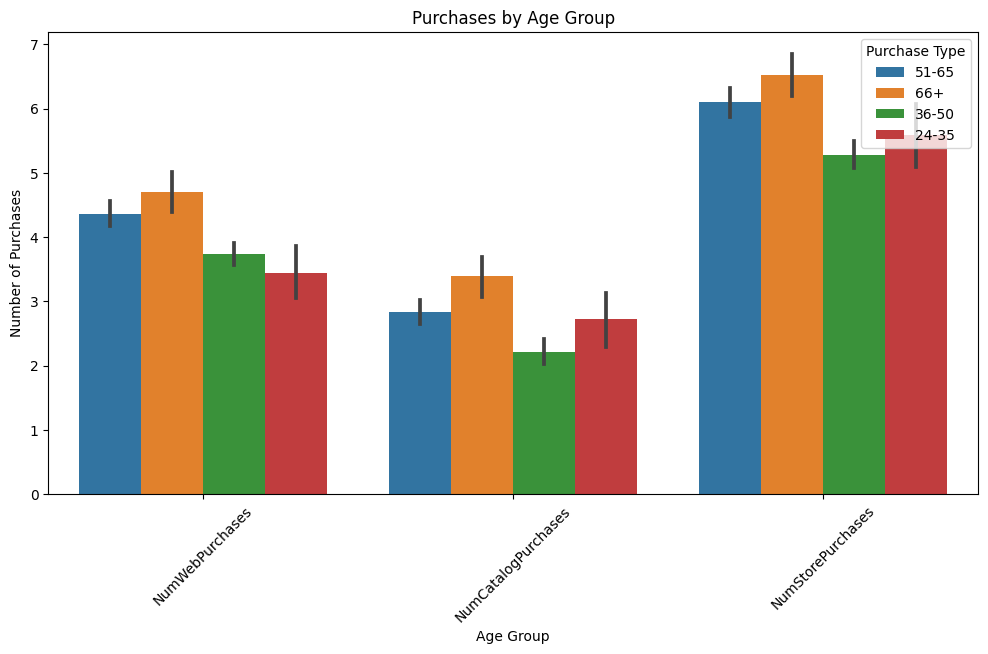

In [32]:
purchases_age_df = df[['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'Age Group']]
purchases_age_df = purchases_age_df.melt(id_vars='Age Group', var_name='Purchase Type', value_name='Number of Purchases')

plt.figure(figsize=(12, 6))
#sns.barplot(data=purchases_age_df, x='Age Group', y='Number of Purchases', hue='Purchase Type')
sns.barplot(data=purchases_age_df, x='Purchase Type', y='Number of Purchases', hue='Age Group')
plt.title('Purchases by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Purchases')
plt.xticks(rotation=45)
plt.legend(title='Purchase Type', loc='upper right')
plt.show()

Nhận xét: 
- Các khách hàng lựa chọn mua hàng trực tiếp tại cửa hàng nhiều nhất.  
- Các khách hàng ở các nhóm tuổi khác nhau có sự tương đồng về lựa chọn địa điểm mua hàng.

### 6. Phân tích các chiến dịch Marketing

### Xem xét tổng số lượng mua hàng giảm giá ở các nhóm tuổi

Ta vẽ stack barchart để xem xét số lượng khách hàng chấp nhận ưu đãi trong các chiến dịch marketing

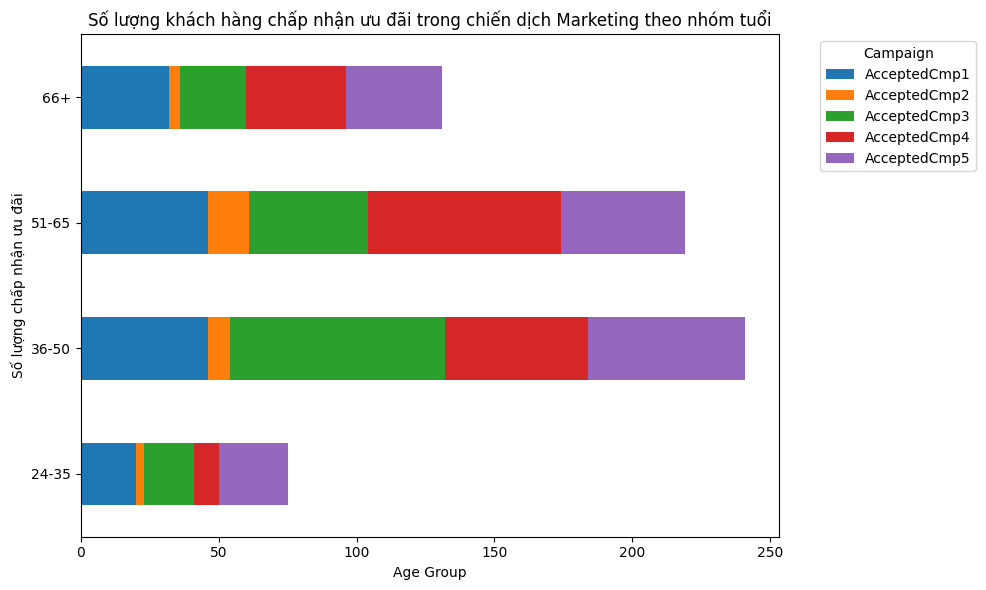

In [33]:
campaign_acceptance_rates = df.groupby('Age Group')[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']].sum()

campaign_acceptance_rates.plot(kind='barh', stacked=True, figsize=(10, 6))
plt.title('Số lượng khách hàng chấp nhận ưu đãi trong chiến dịch Marketing theo nhóm tuổi')
plt.xlabel('Age Group')
plt.ylabel('Số lượng chấp nhận ưu đãi')
plt.xticks(rotation=0)  
plt.legend(title='Campaign', bbox_to_anchor=(1.05, 1), loc='upper left') 
plt.tight_layout()
plt.show()

Nhận xét:
- Nhóm tuôi từ 36-50 chấp nhận nhiều ưu đãi nhất.
- Nhóm tuổi từ 61-65 chấp nhận nhiều ưu đâĩ thứ hai.
- Nhóm tuổi 24-35 là nhóm ít chấp nhận ưu đãi nhất
- Các chiến dịch marketing có vẻ đánh trúng nhóm đối tượng cần thiết, chiếm số lượng đông nhất là nhóm người lớn tuổi.
- Chiến dịch 3 và 4 nhận được sự đồng ý từ nhiều khách hàng nhất.
- Chiến dịch 2 là chiến dịch marketing kém thành công nhất.
- Nhóm khách hàng có chi tiêu trung bình thấp nhất 35-50 đã tham gia nhiều chiến dịch ưu đãi nhất, góp một phần lí giải tại sao nhóm 35-50 dù mua hàng nhiều hơn lại có chi tiêu trung bình thấp hơn nhóm 24-35 tuổi.